### Домашняя работа №1.2 (проверка статистистических гипотез)

В данной работе используется ыборка, собранная в ходе проведения A/B тестирования в мобильной игре Cookie Cats. 

В данной игре устанавливается временное ограничение на число уровней, которые игрок может пройти подряд. Первое такое ограничение находится на 30 уровне, то есть, после прохождения первых 30 уровней игры, игроку необходимо подождать некоторое время или заплатить деньги, чтобы продолжить играть. В тестировании первое ограничение было смещено на 40 уровень для некоторых игроков. 

Выборка содержит данные для 90189 игроков. Для каждого игрока указана версия игры (version) принимающая значения gate_30 и gate_40 соответственно для разных уровней ограничений. Также присутствует колонка sum_gamerounds содержащая общее число игровых раундов для игрока в первые 7 дней после установки. Таким образом, необходимо понять, повлияло ли смещение первого ограничения на заинтересованность игрой. Заинтересованность будем измерять по параметру sum_gamerounds, то есть числу игровых раундов в первые 7 дней. Данную задачу можно свести к проверке гипотезы об однородности двух выборок, где первая выборка содержит число игровых раундов для каждого игрока в стандартной версии игры с ограничением на 30 уровне, а вторая выборка — число игровых раундов для игроков в версии с ограничением на 40 уровне.

### Условия

Можно использовать pandas, numpy, matplotlib/seaborn, и scipy.

### Задачи

1. Проанализировать данные - вывести размеры двух групп, их средние число сыгранных раундов и тд. - 3 балла
2. Визуализировать данные - вывести гистограммы и box-plot, проанализировать выбросы - 3 балла
3. Оценить стат. значимость различия в выборках с помощью минимум 2 критериев на выбор - 4 балла

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import os

PATH_TO_DATA = './data_statistics/'

In [46]:
cats = pd.read_csv(os.path.join(PATH_TO_DATA, 'cookie_cats.csv'))

In [47]:
cats_30 = cats[cats['version'] == 'gate_30']
cats_40 = cats[cats['version'] == 'gate_40']

size_30 = cats_30.shape[0]
size_40 = cats_40.shape[0]

mean_30 = cats_30['sum_gamerounds'].mean()
mean_40 = cats_40['sum_gamerounds'].mean()

median_30 = cats_30['sum_gamerounds'].median()
median_40 = cats_40['sum_gamerounds'].median()

std_30 = cats_30['sum_gamerounds'].std()
std_40 = cats_40['sum_gamerounds'].std()

print(f"Размер группы gate_30: {size_30}")
print(f"Среднее число игровых раундов (gate_30): {mean_30}")
print(f"Медиана числа игровых раундов (gate_30): {median_30}")
print(f"Стандартное отклонение числа игровых раундов (gate_30): {std_30}")

print(f"Размер группы gate_40: {size_40}")
print(f"Среднее число игровых раундов (gate_40): {mean_40}")
print(f"Медиана числа игровых раундов (gate_40): {median_40}")
print(f"Стандартное отклонение числа игровых раундов (gate_40): {std_40}")


Размер группы gate_30: 44700
Среднее число игровых раундов (gate_30): 52.45626398210291
Медиана числа игровых раундов (gate_30): 17.0
Стандартное отклонение числа игровых раундов (gate_30): 256.7164231160407
Размер группы gate_40: 45489
Среднее число игровых раундов (gate_40): 51.29877552814966
Медиана числа игровых раундов (gate_40): 16.0
Стандартное отклонение числа игровых раундов (gate_40): 103.29441621652788


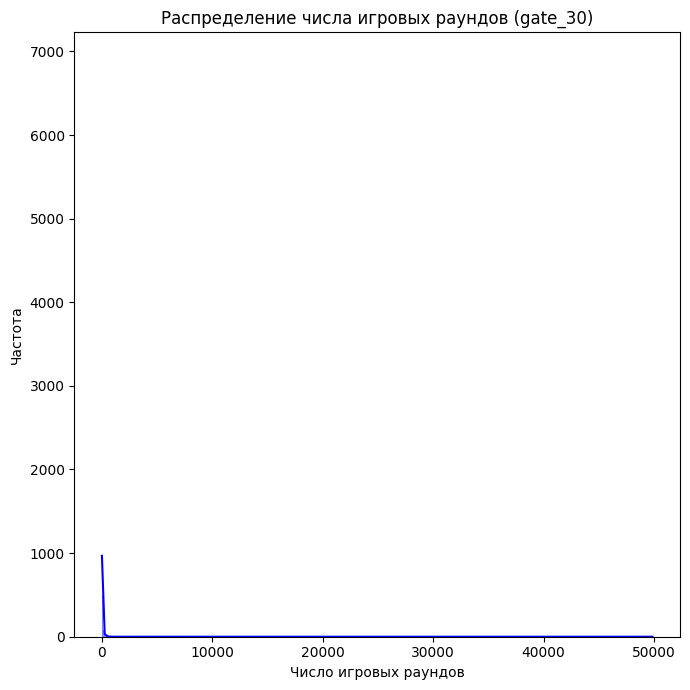

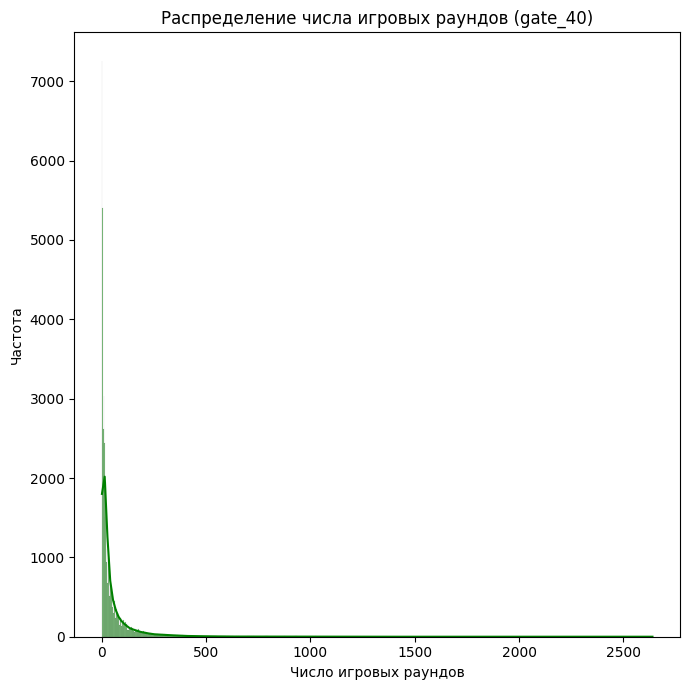

In [48]:
plt.figure(figsize=(7, 7))
sns.histplot(cats_30['sum_gamerounds'], kde=True, color='blue')
plt.title('Распределение числа игровых раундов (gate_30)')
plt.xlabel('Число игровых раундов')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 7))
sns.histplot(cats_40['sum_gamerounds'], kde=True, color='green')
plt.title('Распределение числа игровых раундов (gate_40)')
plt.xlabel('Число игровых раундов')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()


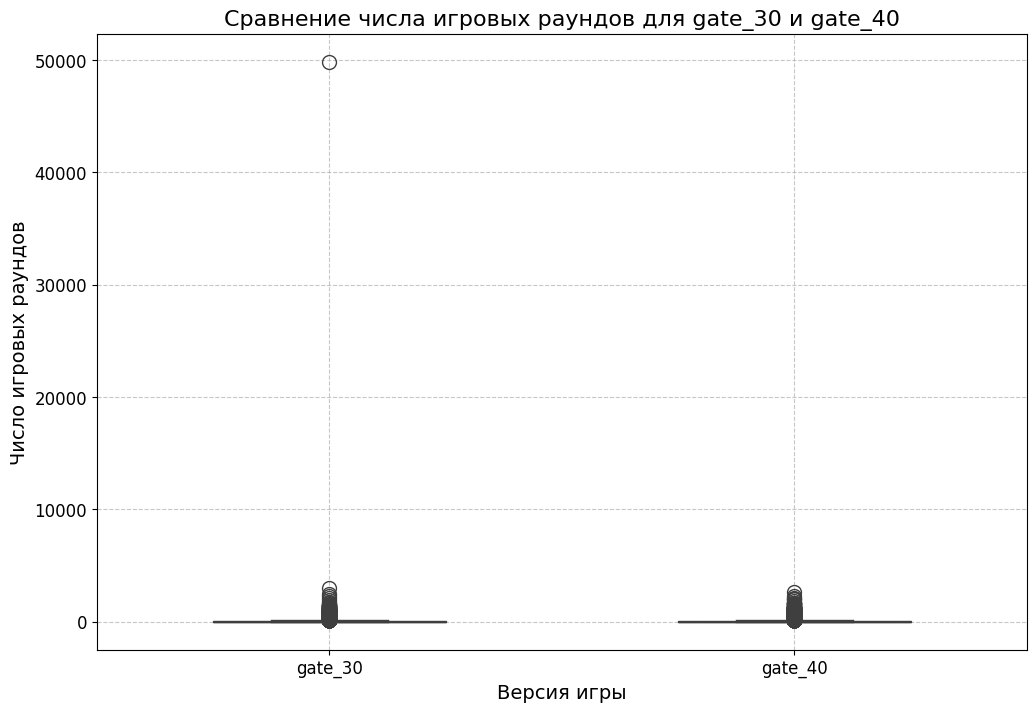

In [49]:
plt.figure(figsize=(12, 8))

sns.boxplot(
    data=cats, 
    x='version', 
    y='sum_gamerounds',
    width=0.5,
    fliersize=10
)

plt.title('Сравнение числа игровых раундов для gate_30 и gate_40', fontsize=16)
plt.xlabel('Версия игры', fontsize=14)
plt.ylabel('Число игровых раундов', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [50]:
t_stat, p_value_ttest = stats.ttest_ind(cats_30['sum_gamerounds'], cats_40['sum_gamerounds'])
print(f"T-тест: t-статистика = {t_stat}, p-значение = {p_value_ttest}")

u_stat, p_value_mw = stats.mannwhitneyu(cats_30['sum_gamerounds'], cats_40['sum_gamerounds'])
print(f"Критерий Манна-Уитни: U-статистика = {u_stat}, p-значение = {p_value_mw}")

T-тест: t-статистика = 0.8910426211362967, p-значение = 0.37290868247405207
Критерий Манна-Уитни: U-статистика = 1024331250.5, p-значение = 0.05020880772044255


Оба теста (t-тест и критерий Манна-Уитни) показывают, что различия между выборками gate_30 и gate_40 не являются статистически значимыми. Основываясь на полученных значениях, можно сделать вывод, что изменение ограничения уровня с 30 на 40 не оказало значимого влияния на количество игровых раундов, сыгранных игроками в первые 7 дней после установки игры.